In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# reading train competition data from Kaggle
url = "https://drive.google.com/file/d/1noIDplOMnCMK7HuCmVGuoBMj7jsfixMe/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
train = pd.read_csv(path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# reading test competition data from Kaggle
url = "https://drive.google.com/file/d/1U2z3fKjnQZ7hg2zc2kL9htGTzuw7wqI6/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test = pd.read_csv(path)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
data = train.append(test,sort=False) #Make train set and test set in the same data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

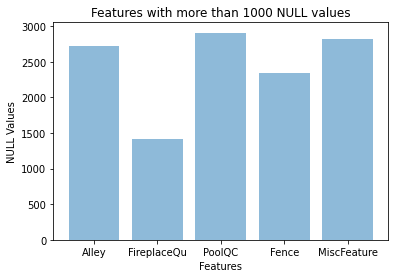

In [ ]:
#Plot features with more than 1000 NULL values
features = []
nullValues = []
for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

In [ ]:
#Dealing with NULL values
data = data.dropna(axis=1, how='any', thresh = 1000) #Drop columns that contain more than 1000 NULL values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [ ]:
data = data.fillna(data.mean()) #Replace NULL values with mean values

<ipython-input-60-edcd42536a43>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean()) #Replace NULL values with mean values


In [ ]:
#Dealing with NULL values
data = pd.get_dummies(data) #Convert string values to integer values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 277 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), uint8(239)
memory usage: 1.5 MB


In [ ]:
#Drop features that are correlated to each other

Correlation = data.corr()
listOfFeatures = [i for i in Correlation]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(Correlation[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

data = data.drop(setOfDroppedFeatures, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 253 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(23), uint8(220)
memory usage: 1.4 MB


In [ ]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

data = data.drop(nonCorrelatedWithOutput, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 139 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(8), int64(17), uint8(114)
memory usage: 917.9 KB


In [220]:
newTrain = data.iloc[:1459]
newTest = data.iloc[1460:]

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = newTrain.drop(outlierValuesList) #Drop outlier rows
    
trainWithoutOutliers = newTrain

In [221]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = trainWithoutOutliers["SalePrice"]
newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column

In [ ]:
#Make Decision Tree Regression prediction
tree = DecisionTreeRegressor()
tree.fit(X,Y)
treepred = tree.predict(newTest)

In [ ]:
#Make Random Forest Regression prediction
rf = RandomForestRegressor()
rf.fit(X,Y)
rfpred = rf.predict(newTest)

In [ ]:
from sklearn.ensemble import VotingRegressor

emodel = VotingRegressor(estimators= [('DT',tree),('RF',rf),('LR',reg)]).fit(X,Y)
print(emodel.score(X,Y))

0.8816762311930265


In [ ]:
vrpred = emodel.predict(newTest)

In [ ]:
params = {
    "n_estimators": 5,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
#Make Linear Regression prediction
from sklearn import datasets, ensemble

reg = ensemble.GradientBoostingRegressor(**params).fit(X, Y)
#reg = LinearRegression().fit(X, Y)
regpred = reg.predict(newTest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, reg.predict(newTest))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.3013


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, reg.predict(newTest))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 0.4340


In [ ]:
rmse = np.sqrt(mean_squared_error(Y, reg.predict(newTest)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 0.5489


In [ ]:
performances = pd.DataFrame(columns=["performance_tree", "performance_rf","performance_reg"])
# Add the first performances of the baseline models to the DataFrame.
performances.loc["Model", "performance_tree"] = r2_score(Y, treepred)
performances.loc["Model", "performance_rf"] = r2_score(Y, rfpred)
performances.loc["Model", "performance_reg"] = r2_score(Y, regpred)
performances.loc["Model", "performance_cat"] = r2_score(Y, Catpred)
performances.loc["Model", "performance_xgboost"] = r2_score(Y, xgpred)
performances.loc["Model", "performance_VR"] = r2_score(Y, vrpred)
performances

,performance_tree,performance_rf,performance_reg,performance_cat,performance_xgboost,performance_VR
Model,-1.032153,-0.801131,0.000473,-0.883347,-0.888226,-0.387886


In [ ]:
from google.colab import files
df = pd.DataFrame().assign(Id=test['Id'], SalePrice=regpred)
df.to_csv('sample_submission.csv', index = False)
files.download("sample_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#PCA
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()

model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=5), KNeighborsRegressor(weights='uniform',p=2,n_neighbors=27))

model_pipeline.fit(X, Y)

end_time = time.time()

time_taken_retrain_pca = end_time - start_time
best_score_retrain_pca = model_pipeline.score(X, Y)

print(f"Time taken: {time_taken_retrain_pca} seconds")
print(f"Accuracy {round(best_score_retrain_pca * 100, 2)}%")

Time taken: 0.07492804527282715 seconds
Accuracy 82.49%


In [ ]:
#CatBoostRegressor
!pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost.core import CatBoostRegressor

model_CBR = CatBoostRegressor(loss_function='RMSE')
model_CBR.fit(X, Y)
Catpred = model_CBR.predict(newTest)

In [ ]:
len(Catpred)

1459

In [ ]:
from xgboost import XGBRegressor

model_xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=0.0,
             n_estimators=1250, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1)
model_xg.fit(X, Y)
xgpred = model_xg.predict(newTest)

[14:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgpred

array([11.771075, 12.007574, 12.108129, ..., 12.079529, 11.664031,
       12.301796], dtype=float32)

In [ ]:
# Initialize KBest, using the f-regression and setting k=10.
from sklearn.feature_selection import SelectKBest, f_regression

KBest = SelectKBest(score_func=f_regression, k=10)
KBest.fit_transform(X, Y)
kpred = KBest.transform(newTest)
X.shape, Y.shape, newTest.shape

((1459, 138), (1459,), (1459, 138))